In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn import metrics

In [7]:
path =  'C:\\Users\jose_\Desktop\covid-19_model'
datos_total = pd.read_csv(path + "\datos_covid\Casos_Diarios_Estado_Nacional_Confirmados_20220109.csv", sep = ',')
datos_total.head()

,cve_ent,poblacion,nombre,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,...,2021-12-31,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,136,30,58,358,362,333,320,101,6,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,427,98,164,813,1021,1269,988,589,141,1
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,586,278,289,863,1041,905,765,642,353,31
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,14,15,28,86,94,110,88,55,8,0
4,7,5730367,CHIAPAS,0,0,0,1,0,0,0,...,19,4,9,20,24,32,34,17,3,0


In [8]:
names = datos_total["nombre"]
datos_total = datos_total.drop(["cve_ent","poblacion","nombre"],axis = 1)

In [9]:
datos_total.head()

,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,...,2021-12-31,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09
0,0,0,0,0,0,0,0,0,0,0,...,136,30,58,358,362,333,320,101,6,0
1,0,0,0,0,0,0,0,0,0,0,...,427,98,164,813,1021,1269,988,589,141,1
2,0,0,0,0,0,0,0,0,0,0,...,586,278,289,863,1041,905,765,642,353,31
3,0,0,0,0,0,0,0,0,0,0,...,14,15,28,86,94,110,88,55,8,0
4,0,0,0,1,0,0,0,0,0,0,...,19,4,9,20,24,32,34,17,3,0


In [10]:
casos_nacional = datos_total.iloc[[-1]]
casos_nacional = pd.melt(casos_nacional, var_name = "", value_name = "Casos")
casos_nacional[""] = pd.to_datetime(casos_nacional[""])
casos_nacional = casos_nacional.set_index("")
casos_nacional = casos_nacional["Casos"]
casos_nacional.head()


2020-02-26    0
2020-02-27    4
2020-02-28    2
2020-02-29    2
2020-03-01    2
Name: Casos, dtype: int64

In [11]:
datos_total = datos_total.set_index(names)
datos_total = datos_total.T

In [12]:
datos_total.iloc[:,14]

2020-02-26       0
2020-02-27       1
2020-02-28       1
2020-02-29       1
2020-03-01       0
              ... 
2022-01-05    1665
2022-01-06    1675
2022-01-07    1045
2022-01-08     240
2022-01-09       1
Name: MEXICO, Length: 684, dtype: int64

In [13]:
datos_sma = pd.DataFrame()
for i in range(33):
    datos_sma[names[i]] = datos_total.iloc[:,i].rolling(window = 7).mean()[6:-1]

In [14]:
datos_sma.index = pd.to_datetime(datos_sma.index)

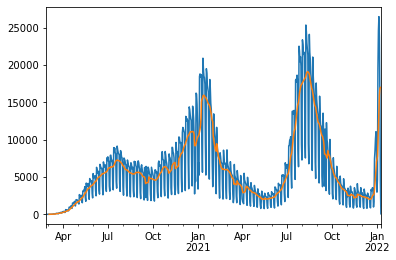

In [15]:
casos_sma = casos_nacional.rolling(window = 7).mean()[6:-1]
casos_nacional.plot()
casos_sma.plot()
plt.show()
casos_diff = casos_sma.diff(periods = 1)
#casos_diff[0:120].plot()

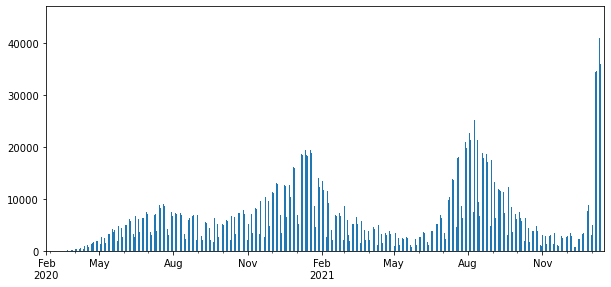

In [34]:
# Create pandas stacked bar chart
ax = casos_nacional.plot.bar(stacked=False, figsize=(10,5))

# Create list of monthly timestamps by selecting the first weekly timestamp of each
# month (in this example, the first Sunday of each month)
monthly_timestamps = [timestamp for idx, timestamp in enumerate(casos_nacional.index)
                      if (timestamp.month != casos_nacional.index[idx-1].month) | (idx == 0)]

# Automatically select appropriate number of timestamps so that x-axis does
# not get overcrowded with tick labels
step = 1
while len(monthly_timestamps[::step]) > 10: # increase number if time range >3 years
    step += 1
timestamps = monthly_timestamps[::step]

# Create tick labels from timestamps
labels = [ts.strftime('%b\n%Y') if ts.year != timestamps[idx-1].year
          else ts.strftime('%b') for idx, ts in enumerate(timestamps)]

# Set major ticks and labels
ax.set_xticks([casos_nacional.index.get_loc(ts) for ts in timestamps])
ax.set_xticklabels(labels)

# Set minor ticks without labels
ax.set_xticks([casos_nacional.index.get_loc(ts) for ts in monthly_timestamps], minor=True)

# Rotate and center labels
ax.figure.autofmt_xdate(rotation=0, ha='center')

In [37]:
datos_muertes = pd.read_csv(path + '\datos_covid\Casos_Diarios_Estado_Nacional_Defunciones_20211110.csv',sep=',')
datos_muertes = datos_muertes.drop(["cve_ent","poblacion","nombre"],axis = 1)
datos_muertes.head()

,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,...,2021-11-01,2021-11-02,2021-11-03,2021-11-04,2021-11-05,2021-11-06,2021-11-07,2021-11-08,2021-11-09,2021-11-10
0,0,0,0,0,0,0,0,0,0,0,...,3,3,5,2,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,13,20,14,24,9,6,16,19,5,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,3,1,0,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [10]:
muertes_nacional = datos_muertes.iloc[[-1]]
muertes_nacional = pd.melt(muertes_nacional, var_name = "Fecha", value_name = "Casos")
muertes_nacional["Fecha"] = pd.to_datetime(muertes_nacional["Fecha"])
muertes_nacional = muertes_nacional.set_index("Fecha")
muertes_nacional = muertes_nacional["Casos"]
muertes_nacional.head()

Fecha
2020-03-17    0
2020-03-18    3
2020-03-19    0
2020-03-20    1
2020-03-21    0
Name: Casos, dtype: int64

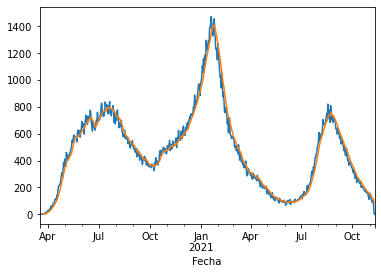

<AxesSubplot:xlabel='Fecha'>

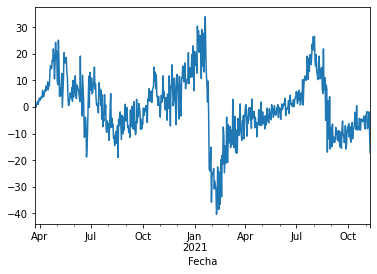

In [11]:
muertes_sma = muertes_nacional.rolling(window = 7).mean()[6:-1]
muertes_nacional.plot()
muertes_sma.plot()
plt.show()
muertes_diff = muertes_sma.diff(periods = 1)[1:]
muertes_diff.plot()

<AxesSubplot:>

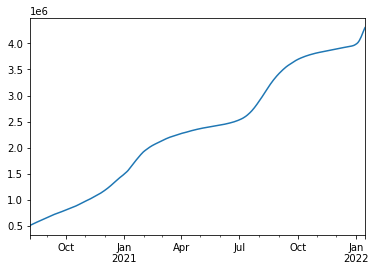

In [37]:
casos_acum = np.cumsum(casos_sma[6:])
casos_acum.head()
casos_acum[150:].plot()

## Datos de vacunaciones

In [15]:
path =  'C:\\Users\jose_\Desktop\covid-19_model'
datos = pd.read_csv(path + "\datos_covid\datos_world.csv", sep = ',')
datos["date"] = pd.to_datetime(datos["date"])
datos = datos.set_index("date")
datos.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,MEX,North America,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
2020-01-02,MEX,North America,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
2020-01-03,MEX,North America,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
2020-01-04,MEX,North America,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
2020-01-05,MEX,North America,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.9,21.4,87.847,1.38,75.05,0.779,-354.3,NaN,NaN,NaN


In [21]:
datos.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'new_tests',
       'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_density', 

<AxesSubplot:xlabel='date'>

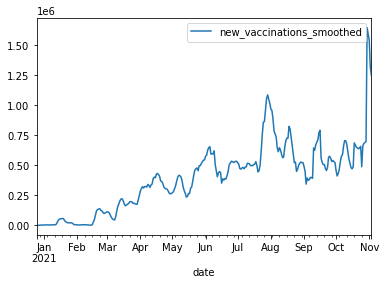

In [22]:
vacunas = datos["new_vaccinations_smoothed"].dropna()
vacunas.plot(legend = True)

<AxesSubplot:xlabel='date'>

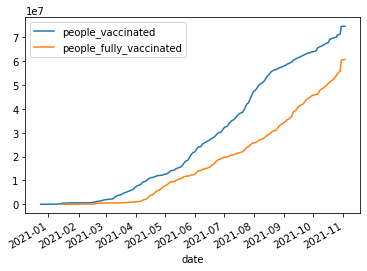

In [23]:
personas_vacunas_1 = datos["people_vaccinated"].dropna()
personas_vacunas_2 = datos["people_fully_vaccinated"].dropna()
personas_vacunas_1.plot(legend = True)
personas_vacunas_2.plot(legend = True)

## Datos de la UNAM

In [24]:
datos_covid = pd.read_csv(path + '\datos_covid\evolucion_nac3_1b.csv')
datos_covid["fecha_i"] = pd.to_datetime(datos_covid["fecha_i"])
datos_covid = datos_covid.set_index("fecha_i")
datos_covid.head()

,positivos,positivos_cum,muertes,muertes_cum,recuperados,recuperados_cum,activos,activos_cum,recu_neto,inferidos_8,...,letalidad,incdia_acum,incdia_recu,incdia_muer,incdia_act,rec_rate,rec_rate2,beta,beta2,r0
fecha_i,,,,,,,,,,,,,,,,,,,,,
2020-02-19,1,1,0,0,0,0,0,0,-1,0,...,0.0,1,0,0,0,0.0,0.0,0.0,0.0,0.0
2020-02-20,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2020-02-21,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2020-02-22,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2020-02-23,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [25]:
casos = datos_covid["positivos"]
casos_sma_1 = casos.rolling(window = 7).mean()[6:-1]

<AxesSubplot:xlabel='fecha_i'>

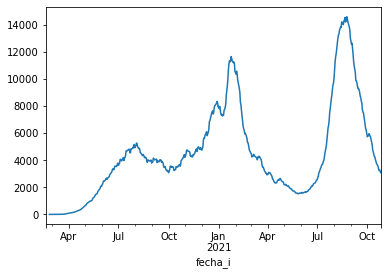

In [26]:
recuperados = datos_covid["recuperados"]
rec_sma = recuperados.rolling(window = 7).mean()
rec_sma.plot()

In [27]:
muertes = datos_covid["muertes"]
muertes_sma_1 = muertes.rolling(window = 7).mean()

<AxesSubplot:>

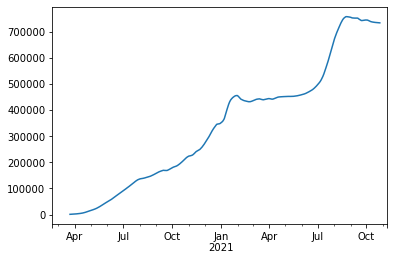

In [28]:
activos = np.cumsum(casos_sma)-np.cumsum(rec_sma)-np.cumsum(muertes_sma)
activos.plot()

<AxesSubplot:>

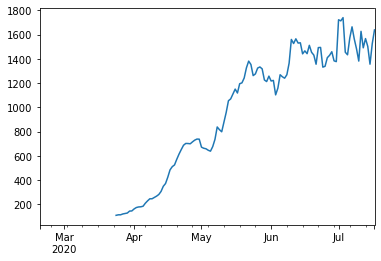

In [29]:
activos_diff = activos.diff(periods = 1)
activos_diff[0:150].plot()

  # Modelo LSTM

In [38]:
#Importamos las librerías para el modelo LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Creamos una función que separa convierte una lista en una matriz y un vector de resultados

In [18]:
def split_list(arr, n_steps):
    X,y = list(), list()
    for i in range(len(arr)):
        end = i + n_steps
        if end > len(arr)-1:
            break
        X.append(arr[i:end])
        y.append(arr[end])
    return np.array(X),np.array(y)

In [19]:
n_steps = 3
arr = [10,20,30,40,50,60,70,80,90]
x,y = split_list(arr,n_steps)
x

array([[10, 20, 30],
       [20, 30, 40],
       [30, 40, 50],
       [40, 50, 60],
       [50, 60, 70],
       [60, 70, 80]])

In [20]:
for i in range(len(x)):
    print(x[i],y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [21]:
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))
np.shape(x)

(6, 3, 1)

This is a one layer LSTM model that reads a 3 dimensional input and outputs a 2D array

In [22]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [23]:
# fit model
model.fit(x, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[102.878044]]


## Stacked LSTM

We can stack LSTM layers by asking the model the first layer to output a value for each time step as follows:

In [24]:
#model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))

In [60]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(x, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[104.244514]]


## Bidirectional LSTM

In [61]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(x, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.56053]]


# Multi-step LSTM

If we want to predict more than one value into the future we need to apply other models of LSTM.
But first we need to prepare our data. We want to create to arrays, one with the input values and the other with output values

In [39]:
# Function to split a univariate time series into a matrices of input and output values
def series_split_multi(series, n_input, n_output):
    X, y = list(), list()
    for i in range(len(series)):
        end_x = n_input + i
        end_y = n_output + end_x
        if end_y > len(series):
            break
        X.append(series[i:end_x])
        y.append(series[end_x:end_y])
    return np.array(X), np.array(y)

In [40]:
n_steps_in, n_steps_out = 3, 2
l = [10,20,30,40,50,60,70,80,90]
X, y = series_split_multi(l,n_steps_in,n_steps_out)
for i in range(len(X)):
    print(X[i],y[i])

[10 20 30] [40 50]
[20 30 40] [50 60]
[30 40 50] [60 70]
[40 50 60] [70 80]
[50 60 70] [80 90]


The LSTM expects the input data to be in the form of a 3D array: samples, timesteps, features. Currently it is in the shape (samples, timesteps) and we only have one feature so this is straightforward.

In [41]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape, y.shape

((5, 3, 1), (5, 2))

# Multi-step Forecasting with walk forward validation

Now we will start predicting the covid-19 cases week by week using walk-forward validation. This means that the model will be given the first week of data and it will predict the second week. Then the actual week 2 data will be given in order to predict week 3 using weeks 1 and 2, and so on.\\
First we have to split the data into train and test and organize it in chunks of weeks:

In [42]:
from sklearn.metrics import *

In [43]:
def smape(y,y_hat):
    s = 0
    for i in range(len(y)):
        s = s + np.abs((y[i]-y_hat[i])/(y[i]+y_hat[i]))
    smape = s*2/len(y)
    return smape

In [46]:
casos_sma.count(), casos_acum.count()

(684, 678)

In [47]:
def split_weeks(data,n_test,n_input):
    # Divide in train and test sets
    train, test = data[:-n_test], data[-n_test:]
    # Split into weeks
    train = np.array(np.split(train, len(train)/n_input))
    test = np.array(np.split(test, len(test)/n_input))
    return train, test

## Univariate input and vector output

We can see that the training set has only 83 weeks, which is not a lot for our model, so we can arranged the data in a different way. This will be to set it up so that the first week has the values [d1,d2,d3,d4,d5,d6,d7] and the second week [d2,d3,d4,d5,d6,d7,d8] and so on.

In [48]:
# Function to split a univariate time series into a matrices of input and output values
def series_split_multi(series, n_input, n_output):
    #flatten
    series = np.reshape(series, series.shape[0]*series.shape[1])
    X, y = list(), list()
    for i in range(len(series)):
        end_x = n_input + i
        end_y = n_output + end_x
        if end_y > len(series):
            break
        X.append(series[i:end_x])
        y.append(series[end_x:end_y])
    X = np.array(X)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    return X, np.array(y)

Next we have the function to build the model and make a forecast into the future based on the data of the previous week

In [49]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Flatten

In [50]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

## Vanila LSTM

In [51]:
# Vanila lstm
def build_model(train, n_input, epochs, neurons_lstm, neurons_dense, batch):
    # prepare data
    train_x, train_y = series_split_multi(train, n_input, n_input)
    # define parameters
    verbose = 0
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    # define model
    model = Sequential()
    model.add(LSTM(neurons_lstm, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Dense(neurons_dense, activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch, verbose=verbose)
    return model

## Encoder-decoder LSTM

In [52]:
# Encoder decoder lstm (two lstm layers stacked)
def build_model_stacked(train, n_input):
    # prepare data
    train_x, train_y = series_split_multi(train, n_input, n_input)
    # define parameters
    verbose, epochs, batch_size = 0, 50, 16
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    # reshape output into [samples, timesteps, features]
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
    # define model
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(RepeatVector(n_outputs))
    model.add(LSTM(128, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(150, activation='relu')))
    model.add(TimeDistributed(Dense(1)))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

## CNN LSTM

In [53]:
# CNN LSTM
def build_model_cnn(train, n_input):
    # prepare data
    train_x, train_y = series_split_multi(train, n_input, n_input)
    # define parameters
    verbose, epochs, batch_size = 0, 20, 10
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    # reshape output into [samples, timesteps, features]
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
    # define model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(RepeatVector(n_outputs))
    model.add(LSTM(200, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(100, activation='relu')))
    model.add(TimeDistributed(Dense(1)))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

In [54]:
# Convolutional LSTM
def build_model_conv(train, n_input, n_steps = 4, n_length=7):
	# prepare data
	train_x, train_y = series_split_multi(train, n_input, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 20, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape into subsequences [samples, time steps, rows, cols, channels]
	train_x = train_x.reshape((train_x.shape[0], n_steps, 1, n_length, n_features))
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
	model.add(Flatten())
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

In [55]:
# Forecast
def forecast(model,history, n_input):
    data = np.array(history)
    data = data.reshape(data.shape[0]*data.shape[1])
    input_x = data[-n_input:]
    # For Convolutional LSTM
    #input_x = input_x.reshape((1, 1, 1, n_input, 1))
    #For any other LSTM model
    input_x = input_x.reshape((1,len(input_x),1))
    
    # forecast the next week
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast
    yhat = yhat[0]
    return yhat        

In [56]:
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = np.sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = np.sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

In [57]:
# Function to evaluate to the model
def evaluate_model(train, test, n_input, epochs = 100, neurons_lstm = 128, neurons_dense = 150, batch = 16):
    #Train the model
    model = build_model(train,n_input,epochs, neurons_lstm, neurons_dense, batch) # Vanila lstm
    #model = build_model_stacked(train,n_input) # Encoder-decoder lstm
    #model = build_model_cnn(train,n_input) # cnn lstm
    #model = build_model_conv(train,n_input=n_input) # conv lstm
    #Hiistory in weekly data
    history = [x for x in train]
    predictions = []
    for i in range(len(test)):
        yhat = forecast(model, history, n_input)
        predictions.append(yhat)
        history.append(test[i,:])
    predictions = np.array(predictions)
    score, scores = evaluate_forecasts(test, predictions)
    return score, scores, predictions

In [58]:
import time
import math
def best_scores(train,test,n_input, epochs, neurons_lstm, neurons_dense, batch):
    print(f"Corriendo el modelo LSTM")
    print(f"Epochs: {epochs}, Neurons_lstm: {neurons_lstm}, Neurons_dense: {neurons_dense}, Batch Size: {batch}")
    print("===================")
    start = time.time()
    rmse = []
    min_error = math.inf
    for i in range(30):
        start_exp = time.time()
        print(f"Experimento {i+1}")
        score,scores,pred = evaluate_model(train, test, n_input)#, epochs, neurons_lstm, neurons_dense, batch)
        rmse.append(score)
        print("Error del modelo RMSE: %.4f" % (score))
        runtime = time.time() - start_exp
        print("Runtime del experimento %i: %.4f" % (i+1,runtime))
        print("---------------------------------")
        if score < min_error:
            min_error = score
            min_pred = pred
            min_scores = scores
    print("---------------------------------")
    print(f"Runtime: {time.time()-start}")
    return rmse, min_error, min_pred, min_scores

In [59]:
k = casos_acum.count()
while k > 600:
    if k % 7 == 0:
        print(k)
    k = k - 1

672
665
658
651
644
637
630
623
616
609
602


In [85]:
n_test = 28
n_input = 7
resta = 6
#series = casos_sma[:-resta] # Casos diarios (promedio de 7 días)
series_0 = casos_acum[:-resta+1].diff(periods = 1)[1:] # Casos acumulados
series = (series_0 - series_0.min())/(series_0.max()-series_0.min())
train, test = split_weeks(series,n_test,n_input)
print(train.shape)
print(train[0, 0], train[-1, -1])
# validate test
print(test.shape)
print(test[0, 0], test[-1, -1])

(92, 7)
0.0 0.0751699320271863
(4, 7)
0.07308681465685969 1.0


In [86]:
errors, min_error, min_pred, min_scores = best_scores(train, test, 7, epochs = 70, neurons_lstm = 128, 
                                                      neurons_dense = 150, batch = 16)
print("Mean(RMSE) = %.4f, Std(RMSE) = %.4f" % (np.mean(errors),np.std(errors)))

Corriendo el modelo LSTM
Epochs: 70, Neurons_lstm: 128, Neurons_dense: 150, Batch Size: 16
Experimento 1
Error del modelo RMSE: 0.1979
Runtime del experimento 1: 15.7855
---------------------------------
Experimento 2
Error del modelo RMSE: 0.2022
Runtime del experimento 2: 15.8126
---------------------------------
Experimento 3
Error del modelo RMSE: 0.1975
Runtime del experimento 3: 16.3625
---------------------------------
Experimento 4
Error del modelo RMSE: 0.1992
Runtime del experimento 4: 15.5412
---------------------------------
Experimento 5
Error del modelo RMSE: 0.2008
Runtime del experimento 5: 18.3987
---------------------------------
Experimento 6
Error del modelo RMSE: 0.1947
Runtime del experimento 6: 15.4012
---------------------------------
Experimento 7
Error del modelo RMSE: 0.1973
Runtime del experimento 7: 14.9680
---------------------------------
Experimento 8
Error del modelo RMSE: 0.2047
Runtime del experimento 8: 14.4212
---------------------------------
Exper

In [162]:
# univariate multi-step encoder-decoder convlstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# train the model
def build_model(train, n_steps, n_length, n_input):
	# prepare data
	train_x, train_y = series_split_multi(train, n_input, n_input)
	# define parameters
	verbose, epochs, batch_size = 0, 70, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape into subsequences [samples, time steps, rows, cols, channels]
	train_x = train_x.reshape((train_x.shape[0], n_steps, 1, n_length, n_features))
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
	model.add(Flatten())
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(128, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	h = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

# make a forecast
def forecast(model, history, n_steps, n_length, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1]))
	# retrieve last observations for input data
	input_x = data[-n_input:]
	# reshape into [samples, time steps, rows, cols, channels]
	input_x = input_x.reshape((1, n_steps, 1, n_length, 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_input, n_steps = 1, n_length = 7):
	# fit model
	model = build_model(train, n_steps, n_length, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_steps, n_length, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :], predictions)
	return score, scores, predictions

# define the number of subsequences and the length of subsequences
n_steps, n_length = 1, 7
# define the total days to use as input
n_input = n_length * n_steps
#score, scores, predictions = evaluate_model(train, test, n_steps, n_length, n_input)
rmse, min_error, min_pred, min_scores = best_scores(train,test,n_input, epochs = 70, neurons_lstm = 128, 
                                                    neurons_dense = 100, batch = 16)
# summarize scores
#summarize_scores('lstm', score, scores)
# plot scores
#days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
#pyplot.plot(days, scores, marker='o', label='lstm')
#pyplot.show()

Corriendo el modelo LSTM
Epochs: 70, Neurons_lstm: 128, Neurons_dense: 100, Batch Size: 16
Experimento 1
Error del modelo RMSE: 127.6942
Runtime del experimento 1: 30.1137
---------------------------------
Experimento 2
Error del modelo RMSE: 97.3601
Runtime del experimento 2: 30.0994
---------------------------------
Experimento 3
Error del modelo RMSE: 101.4418
Runtime del experimento 3: 34.9549
---------------------------------
Experimento 4
Error del modelo RMSE: 126.4324
Runtime del experimento 4: 32.8888
---------------------------------
Experimento 5
Error del modelo RMSE: 115.1776
Runtime del experimento 5: 36.2958
---------------------------------
Experimento 6
Error del modelo RMSE: 78.5678
Runtime del experimento 6: 38.7873
---------------------------------
Experimento 7
Error del modelo RMSE: 98.0776
Runtime del experimento 7: 32.0097
---------------------------------
Experimento 8
Error del modelo RMSE: 74.9819
Runtime del experimento 8: 34.6581
---------------------------

In [68]:
predictions = min_pred.reshape((min_pred.shape[0]*min_pred.shape[1]))
#predictions = casos_sma[1]+np.cumsum(predictions)
predic_lstm = pd.Series(predictions, index = series[-n_test:].index)

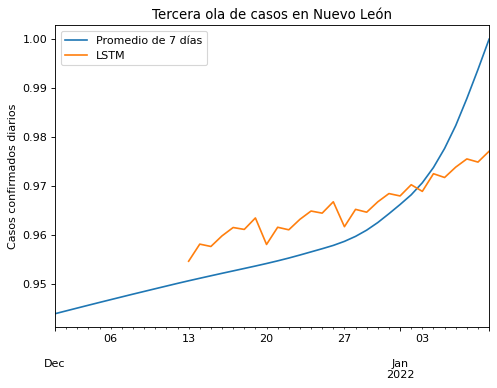

In [69]:
plt.figure(figsize=(7,5),dpi=80)
plt.title(f"Tercera ola de casos en Nuevo León")#. RMSE = %.3f" % min_error, fontsize = 13)
plt.ylabel("Casos confirmados diarios")
series[-40:].plot(label = "Promedio de 7 días")
predic_lstm.plot(label = "LSTM")
plt.legend()

In [145]:
np.sqrt(mean_squared_error(series[-n_test:],predic_lstm))

58.410168137153825

In [146]:
mean_absolute_error(series[-n_test:], predic_lstm)

42.983270761918064

In [147]:
mean_absolute_percentage_error(series[-n_test:], predic_lstm)

0.018306380239038883

In [148]:
smape(series[-n_test:], predic_lstm)

0.018251266841324897

In [149]:
r2_score(series[-n_test:], predic_lstm)

0.912774773102091

In [62]:
#plt.plot(['Ma','Mie','Jue','Vie','Sab','Dom','Lun'],min_scores)

In [61]:
train_m, test_m = split_weeks(muertes_sma[:-2])
print(train_m.shape)
print(train_m[0, 0], train_m[-1, -1])
# validate test
print(test_m.shape)
print(test_m[0, 0], test_m[-1, -1])

(81, 7)
1.0 280.14285714285717
(4, 7)
272.0 120.0


In [62]:
errors, min_error_m, min_pred_m, min_scores_m = best_scores(train_m, test_m, 2)

In [65]:
predict_m = min_pred_m.reshape((min_pred_m.shape[0]*min_pred_m.shape[1]))
#predictions = casos_sma[1]+np.cumsum(predictions)
predic_m = pd.Series(predict_m, index = casos_sma[:-1][-28:].index)

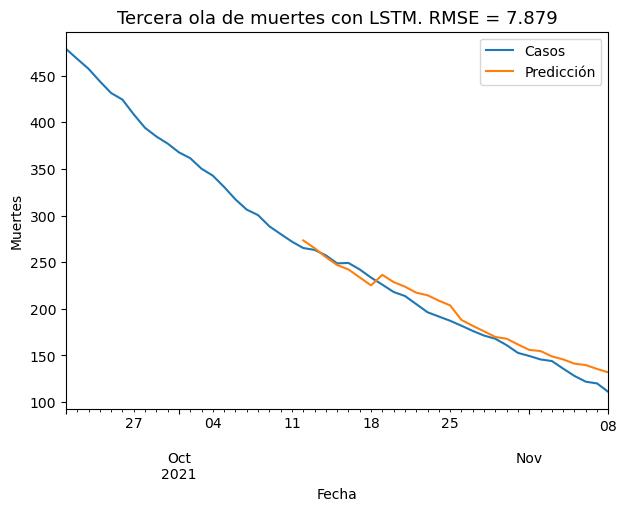

In [79]:
plt.figure(figsize=(7,5),dpi=100)
plt.title(f"Tercera ola de muertes con LSTM. RMSE = %.3f" % min_error_m, fontsize = 13)
plt.ylabel("Muertes")
muertes_sma[-50:-1].plot()
predic_m.plot(label = "Predicción")
plt.legend()

In [68]:
mean_absolute_error(predic_m,muertes_sma[:-2][-28:])

5.97611174291494

In [78]:
mean_absolute_percentage_error(predic_m,muertes_sma[:-2][-28:])

0.03208361023810324

In [83]:
r2_score(predic_m,muertes_sma[:-2][-28:])

0.9659534022953284

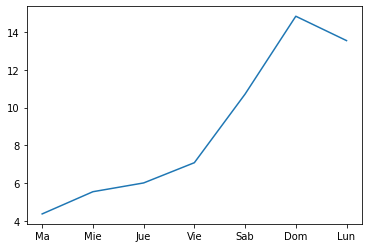

In [110]:
plt.plot(['Ma','Mie','Jue','Vie','Sab','Dom','Lun'],min_scores_m)

Analizando los casos por estado

In [45]:
error = []
predicciones = pd.DataFrame()
for i in range(32):
    casos_estado = datos_total.iloc[[i]]
    casos_estado = pd.melt(casos_estado, var_name = "Fecha", value_name = "Casos")
    casos_estado["Fecha"] = pd.to_datetime(casos_estado["Fecha"])
    casos_estado = casos_estado.set_index("Fecha")
    casos_estado = casos_estado["Casos"]
    estado_sma = casos_estado.rolling(window = 7).mean().dropna()[:-1]
    # Dividir los datos en train y test
    train, test = split_weeks(estado_sma[:-8])
    
    # Hacemos predicciones utilizando LSTM
    errors, min_error, min_pred, min_scores = best_scores(train, test, 7)
    predictions = min_pred.reshape((min_pred.shape[0]*min_pred.shape[1]))
    #predictions = casos_sma[1]+np.cumsum(predictions)
    predic = pd.Series(predictions, index = estado_sma[:-8][-28:].index)
    
    #Guardamos las predicciones en un DataFrame y los errores también
    predicciones[names[i]] = predic
    error.append(min_error)

In [18]:
predicciones

NameError: name 'predicciones' is not defined

In [127]:
error_rmse = np.zeros(32)
for i in range(32):
    casos_estado = datos_total.iloc[[i]]
    casos_estado = pd.melt(casos_estado, var_name = "Fecha", value_name = "Casos")
    casos_estado["Fecha"] = pd.to_datetime(casos_estado["Fecha"])
    casos_estado = casos_estado.set_index("Fecha")
    casos_estado = casos_estado["Casos"]
    estado_sma = casos_estado.rolling(window = 7).mean().dropna()[:-1]
    error_rmse[i] = np.sqrt(mean_squared_error(predicciones.iloc[:,i],estado_sma[:-8][-28:]))

In [132]:
np.mean(error_rmse)

13.224900477644791

## LSTM vanila with prediction intervals

In [94]:
train_x, train_y = series_split_multi(train, 7, 1)
train_x.shape, train_y.shape 

((595, 7, 1), (595, 1))

In [155]:
# train the model
def build_model(train, n_input):
    #prepare data
    train_x, train_y = series_split_multi(train, n_input, 1)
    # define parameters
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    verbose, epochs, batch_size = 0, 70, 16
    # define model
    model = Sequential()
    model.add(LSTM(80, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

# Forecast
def forecast(model,data, n_input):
    input_x = data[-n_input:]
    input_x = input_x.reshape((1,len(input_x),1))
    # forecast the next week
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast
    yhat = yhat[0,0]
    return yhat    

In [177]:
# Function to evaluate to the model
def evaluate_model(train, test, n_input):
    #History in weekly data
    history = [x for x in train]
    pred_mean = []
    pred_std = []
    for i in range(len(test)):
        data = np.array(history)
        data = data.reshape(data.shape[0]*data.shape[1])
        for j in range(len(test[i])):
            yhat = []
            for k in range(10):
                #Train the model
                model = build_model(train,n_input)
                yhat.append(forecast(model,data,n_input))
            pred_mean.append(np.mean(yhat))
            pred_std.append(np.std(yhat))
            np.append(data,np.mean(yhat))         
        history.append(test[i,:])
    return pred_mean, pred_std

In [178]:
y_mean, y_std = evaluate_model(train, test, 7)

In [179]:
predic_lstm = pd.Series(y_mean, index = casos_sma[:-8][-28:].index)

In [180]:
upper, lower = predic_lstm + (1.96)*np.array(y_std), predic_lstm - (1.96)*np.array(y_std) 

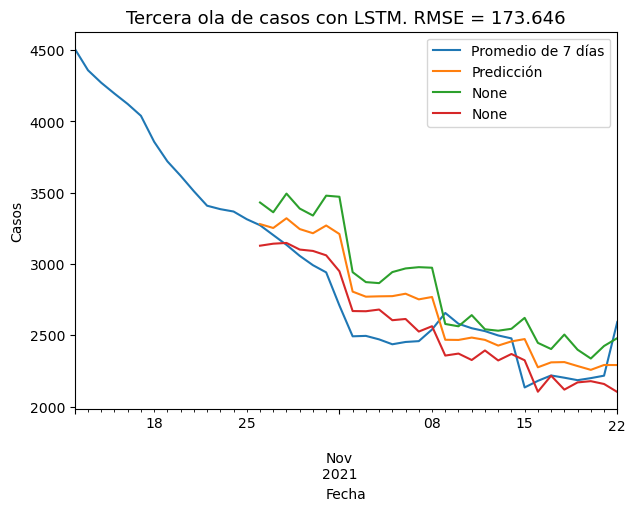

In [181]:
plt.figure(figsize=(7,5),dpi=100)
plt.title(f"Tercera ola de casos con LSTM. RMSE = %.3f" % min_error, fontsize = 13)
plt.ylabel("Casos")
casos_sma[-50:-resta].plot(label = "Promedio de 7 días")
predic_lstm.plot(label = "Predicción")
upper.plot()
lower.plot()
plt.legend()

In [161]:
yhat = []
for k in range(2):
    model = build_model(train,7)
    data = test
    data = data.reshape(data.shape[0]*data.shape[1])
    input_x = data[-7:]
    input_x = input_x.reshape(1,7,1)
    y = model.predict(input_x)
    yhat.append(y[0,0])

In [162]:
yhat

[2399.0747, 2348.0696]

# Modelo ARIMA

In [70]:
from pmdarima import auto_arima

In [71]:
start = 28
periods = 7
pred = []
error = []
coef_int = []
#series = datos_sma["CHIAPAS"][:-29]
for i in range(int(start/periods)):
    model_arima = auto_arima(series[:-start+i*periods], seasonal = False)
    predictions, coefs_int = model_arima.predict(n_periods = periods, return_conf_int=True, alpha = 0.01)
    order = model_arima.get_params()['order']
    pred.append(predictions)
    coef_int.append(coefs_int)

In [72]:
model_arima.arparams(),model_arima.maparams()

(array([0.93507243]), array([-0.48635935, -0.15280756]))

In [73]:
np.shape(model_arima.resid())

(665,)

In [74]:
pred = np.array(pred)
predic = pred.reshape(pred.shape[0]*pred.shape[1])
pred_arima1 = pd.Series(predic, index = series[-start:].index)

coef_int = np.array(coef_int)
inter = coef_int.reshape(coef_int.shape[0]*coef_int.shape[1],coef_int.shape[2])

In [75]:
inter_up = pd.Series(inter[:,0], index = series[-start:].index)
inter_low = pd.Series(inter[:,1], index = series[-start:].index)

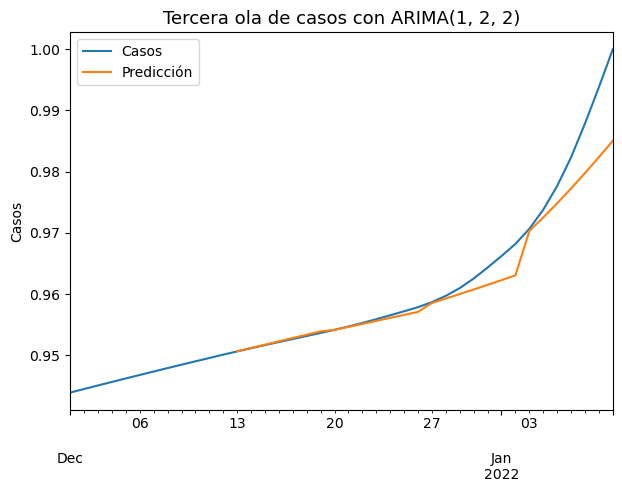

In [76]:
plt.figure(figsize=(7,5),dpi=100)
plt.title(f"Tercera ola de casos con ARIMA{order}", fontsize = 13)
plt.ylabel("Casos")
series[-40:].plot()
pred_arima1.plot(label = "Predicción")
#inter_up.plot()
#inter_low.plot()
plt.legend()

In [77]:
np.sqrt(mean_squared_error(pred_arima1,series[-start:]))

0.004272620960698199

In [78]:
mean_absolute_error(pred_arima1,series[-start:])

0.0022302087595157433

In [79]:
mean_absolute_percentage_error(pred_arima1,series[-start:])

0.0022869981517929443

In [80]:
smape(pred_arima1,series[-start:])

0.0022775644756627537

In [69]:
start = 28
periods = 7
pred = []
error = []
for i in range(int(start/periods)):
    model_arima = auto_arima(muertes_sma[:-2][:-start+i*periods], seasonal = False)
    predictions = model_arima.predict(n_periods = periods)
    order = model_arima.get_params()['order']
    pred.append(predictions)

In [70]:
pred = np.array(pred)
predic_m1 = pred.reshape(pred.shape[0]*pred.shape[1])
pred_arima_m = pd.Series(predic, index = muertes_sma[:-8][-28:].index)

In [71]:
pred_arima_m = pd.Series(predic_m1, index = muertes_sma[:-2][-28:].index)

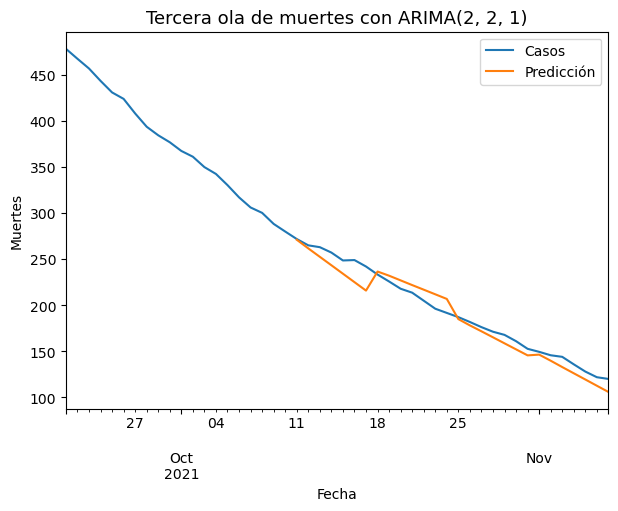

In [76]:
plt.figure(figsize=(7,5),dpi=100)
plt.title(f"Tercera ola de muertes con ARIMA{order}", fontsize = 13)
plt.ylabel("Muertes")
muertes_sma[-50:-2].plot()
pred_arima_m.plot(label = "Predicción")
plt.legend()

In [72]:
np.sqrt(mean_squared_error(pred_arima_m,muertes_sma[:-2][-28:]))

11.19862704942933

In [77]:
mean_absolute_error(pred_arima_m,muertes_sma[:-2][-28:])

9.503409471501788

In [81]:
mean_absolute_percentage_error(pred_arima_m,muertes_sma[:-2][-28:])

0.05343038234804392

In [82]:
r2_score(pred_arima_m,muertes_sma[:-2][-28:])

0.9464527428445545

In [125]:
start = 28
periods = 7
pred_arima = pd.DataFrame()
error_arima = []
print("Forecasting with ARIMA models using auto_arima")
print("----------------------------------------------")
for i in range(32):
    print(" ")
    print(f"Entrenando el Modelo para {names[i]}")
    casos_estado = datos_total.iloc[[i]]
    casos_estado = pd.melt(casos_estado, var_name = "Fecha", value_name = "Casos")
    casos_estado["Fecha"] = pd.to_datetime(casos_estado["Fecha"])
    casos_estado = casos_estado.set_index("Fecha")
    casos_estado = casos_estado["Casos"]
    estado_sma = casos_estado.rolling(window = 7).mean().dropna()[:-1]
    
    predictions = []
    #model_arima = auto_arima(casos_estado[:-8][:-28])
    for j in range(int(start/periods)):
        model_arima = auto_arima(estado_sma[:-8][:-start+j*periods], seasonal = False)
        orden = model_arima.get_params()['order']
        print(f"    Semana prediciendo la semana {j} ARIMA{orden} ---> ", end = "", flush= True)
        
        pred = model_arima.predict(n_periods = periods)
        
        if -start+(j+1)*periods != 0: 
            rmse = np.sqrt(mean_squared_error(pred, estado_sma[:-8][-start+j*periods:-start+(j+1)*periods]))
        else:
            rmse = np.sqrt(mean_squared_error(pred, estado_sma[:-8][-start+j*periods:]))
        
        predictions.append(pred)
        print(f"Error: {rmse}")
    
    # Convertimos la lista de listas de predicciones a numpy    
    predictions = np.array(predictions)
    # Aplanamos el arreglo
    predictions = predictions.reshape(predictions.shape[0]*predictions.shape[1])
    # Convertimos a serie de tiempo
    predic_1 = pd.Series(predictions, index = estado_sma[:-8][-28:].index)
    # Se guardan las predicciones en un Data Frame
    pred_arima[names[i]] = predic_1
    # Se calcula el error
    error = np.sqrt(mean_squared_error(predic_1,estado_sma[:-8][-28:]))
    error_arima.append(error)

Forecasting with ARIMA models using auto_arima
----------------------------------------------
 
Entrenando el Modelo para AGUASCALIENTES
    Semana prediciendo la semana 0 ARIMA(4, 1, 3) ---> Error: 10.483611674679665
    Semana prediciendo la semana 1 ARIMA(2, 1, 4) ---> Error: 16.949721124850182
    Semana prediciendo la semana 2 ARIMA(2, 1, 5) ---> Error: 4.762471390311713
    Semana prediciendo la semana 3 ARIMA(4, 1, 3) ---> Error: 12.946562989809765
 
Entrenando el Modelo para BAJA CALIFORNIA
    Semana prediciendo la semana 0 ARIMA(1, 1, 1) ---> Error: 28.9366273715507
    Semana prediciendo la semana 1 ARIMA(1, 1, 1) ---> Error: 5.626993054409871
    Semana prediciendo la semana 2 ARIMA(1, 1, 1) ---> Error: 49.55655238841448
    Semana prediciendo la semana 3 ARIMA(4, 1, 5) ---> Error: 9.779560379111041
 
Entrenando el Modelo para BAJA CALIFORNIA SUR
    Semana prediciendo la semana 0 ARIMA(5, 1, 2) ---> Error: 1.9876452897050167
    Semana prediciendo la semana 1 ARIMA(5, 1, 2

    Semana prediciendo la semana 2 ARIMA(3, 1, 3) ---> Error: 4.1943812239943705
    Semana prediciendo la semana 3 ARIMA(3, 1, 3) ---> Error: 2.18357120445518
 
Entrenando el Modelo para SAN LUIS POTOSI
    Semana prediciendo la semana 0 ARIMA(3, 1, 4) ---> Error: 26.459549274607266
    Semana prediciendo la semana 1 ARIMA(4, 1, 2) ---> Error: 13.185924198454105
    Semana prediciendo la semana 2 ARIMA(4, 1, 2) ---> Error: 3.1450108760856863
    Semana prediciendo la semana 3 ARIMA(4, 1, 2) ---> Error: 8.710653790544054
 
Entrenando el Modelo para SINALOA
    Semana prediciendo la semana 0 ARIMA(3, 1, 3) ---> Error: 11.120579151765364
    Semana prediciendo la semana 1 ARIMA(3, 1, 4) ---> Error: 12.059505155170907
    Semana prediciendo la semana 2 ARIMA(3, 1, 4) ---> Error: 3.3576322128646474
    Semana prediciendo la semana 3 ARIMA(3, 1, 4) ---> Error: 3.7380772525501214
 
Entrenando el Modelo para SONORA
    Semana prediciendo la semana 0 ARIMA(5, 1, 4) ---> Error: 4.56333294426941

In [117]:
error_rmse = np.zeros(2)
for i in range(2):
    casos_estado = datos_total.iloc[[i]]
    casos_estado = pd.melt(casos_estado, var_name = "Fecha", value_name = "Casos")
    casos_estado["Fecha"] = pd.to_datetime(casos_estado["Fecha"])
    casos_estado = casos_estado.set_index("Fecha")
    casos_estado = casos_estado["Casos"]
    estado_sma = casos_estado.rolling(window = 7).mean().dropna()[:-1]
    error_rmse[i] = np.sqrt(mean_squared_error(pred_arima.iloc[:,i],estado_sma[:-8][-28:]))

In [131]:
np.mean(error_arima)

10.928444990528082

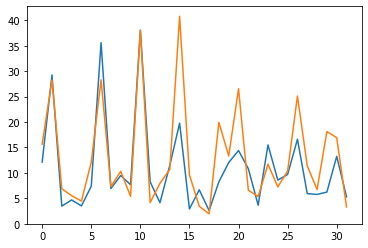

In [129]:
plt.plot(np.arange(0,32),error_arima)
plt.plot(np.arange(0,32),error_rmse)

<AxesSubplot:xlabel='Fecha'>

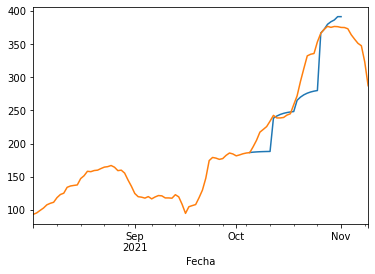

In [121]:
pred_arima["BAJA CALIFORNIA"].plot()
estado_sma[-100:].plot()

# Data embeding

In [88]:
from mpl_toolkits.mplot3d  import Axes3D

In [95]:
embeding = []
x,y,z = list(),list(),list()
for i in range(0,len(casos_nacional),3):
    x.append(casos_nacional[i])    
    y.append(casos_nacional[i+1])
    z.append(casos_nacional[i+2])

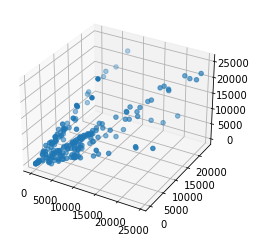

In [100]:
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z);

In [12]:
from tsmoothie.smoother import *
from tsmoothie.bootstrap import BootstrappingWrapper

In [22]:
train = casos_sma[:-28]

In [23]:
smoother = SpectralSmoother(smooth_fraction=0.18, pad_len=12)
smoother.smooth(train.T)

<tsmoothie.smoother.SpectralSmoother>

In [24]:
bts = BootstrappingWrapper(SpectralSmoother(smooth_fraction=0.18, pad_len=12), 
                           bootstrap_type='mbb', block_length=24)
bts_samples = bts.sample(train, n_samples=100)

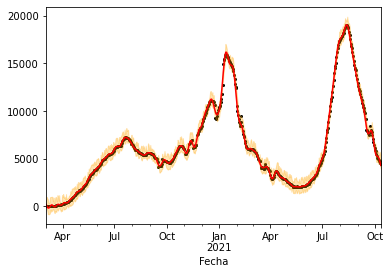

In [25]:
pd.Series(smoother.smooth_data[0], index=train.index).plot(c='red')
plt.scatter(train.index, smoother.data[0], c='black', s=4)
plt.fill_between(train.index, bts_samples.min(0), bts_samples.max(0), alpha=0.3, color='orange')